# Analysis of Financial Markets based on President Trump's Tweets

## Data Preprocessing

### Importing Data

In [1]:
!pip install -q kaggle

In [2]:
# Upload kaggle.json file containing your API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexbakr","key":"700bc569b01d9c82cf48a503f2794191"}'}

In [3]:
!mkdir ~/.kaggle 

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Check to see if the API is working correctly 
# ! kaggle datasets list

In [6]:
! kaggle datasets download -d austinreese/trump-tweets

 73% 5.00M/6.88M [00:00<00:00, 17.7MB/s]
100% 6.88M/6.88M [00:00<00:00, 22.8MB/s]


In [ ]:
! pip install yfinance

### Data Cleaning

In [9]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import re

#### Twitter Data

In [10]:
data = ZipFile("/content/trump-tweets.zip")
trump_tweets = pd.read_csv(data.open('trumptweets.csv'))
trump_tweets.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [11]:
trump_tweets.shape

(41122, 9)

The dataframe shows that there are 41,122 rows and 9 columns. Three of these columns mention, hashtags, and geo are currenly showing NaN for the first five rows. 

In [12]:
trump_tweets.describe()

,id,retweets,favorites,geo
count,4.112200e+04,41122.000000,41122.000000,0.0
mean,6.088909e+17,5455.590657,22356.899105,NaN
std,3.027946e+17,10130.076661,41501.859711,NaN
min,1.698309e+09,0.000000,0.000000,NaN
25%,3.549428e+17,25.000000,28.000000,NaN
50%,5.609149e+17,291.000000,247.000000,NaN
75%,7.941218e+17,8778.000000,32970.750000,NaN
max,1.219077e+18,309892.000000,857678.000000,NaN


In [13]:
#Remove NaN and non-important columns
trump_tweets = trump_tweets.drop(labels=['mentions', 'hashtags', 'geo', 'link'], axis='columns')
trump_tweets

,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965
...,...,...,...,...,...
41117,1218962544372670467,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817
41118,1219004689716412416,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571
41119,1219053709428248576,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944
41120,1219066007731310593,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921


In [14]:
trump_tweets.dtypes

id            int64
content      object
date         object
retweets      int64
favorites     int64
dtype: object

In [15]:
# The date column is an object when it should be datetime
trump_tweets['date'] = pd.to_datetime(trump_tweets['date'], format='%Y%m%d %H:%M:%S')

In [16]:
# Split the date column into 2 seperate columns
trump_tweets['Time'],trump_tweets['Date']= trump_tweets['date'].apply(lambda x:x.time()), trump_tweets['date'].apply(lambda x:x.date())
trump_tweets = trump_tweets.drop(labels='date',axis='columns')

In [17]:
trump_tweets.head()

,id,content,retweets,favorites,Time,Date
0,1698308935,Be sure to tune in and watch Donald Trump on L...,500,868,20:54:25,2009-05-04
1,1701461182,Donald Trump will be appearing on The View tom...,33,273,03:00:10,2009-05-05
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,12,18,15:38:08,2009-05-08
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,11,24,22:40:15,2009-05-08
4,1773561338,"""My persona will never be that of a wallflower...",1399,1965,16:07:28,2009-05-12


In [18]:
trump_tweets['content']

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
41117    I have never seen the Republican Party as Stro...
41118    Now Mini Mike Bloomberg is critical of Jack Wi...
41119    I was thrilled to be back in the Great State o...
41120    “In the House, the President got less due proc...
41121    A great show! Check it out tonight at 9pm. @ F...
Name: content, Length: 41122, dtype: object

In [19]:
# Remove punctuation from content column
trump_tweets['content'] = trump_tweets['content'].str.replace('[^\w\s]','')
trump_tweets['content'] 

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post Celebrity Apprentice Finale and ...
4        My persona will never be that of a wallflower ...
                               ...                        
41117    I have never seen the Republican Party as Stro...
41118    Now Mini Mike Bloomberg is critical of Jack Wi...
41119    I was thrilled to be back in the Great State o...
41120    In the House the President got less due proces...
41121    A great show Check it out tonight at 9pm  FoxN...
Name: content, Length: 41122, dtype: object

In [20]:
# More Cleaning
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

# Clean the tweets
trump_tweets['content'] = trump_tweets['content'].apply(cleanTxt)

# Show the cleaned tweets
trump_tweets['content']

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post Celebrity Apprentice Finale and ...
4        My persona will never be that of a wallflower ...
                               ...                        
41117    I have never seen the Republican Party as Stro...
41118    Now Mini Mike Bloomberg is critical of Jack Wi...
41119    I was thrilled to be back in the Great State o...
41120    In the House the President got less due proces...
41121    A great show Check it out tonight at 9pm  FoxN...
Name: content, Length: 41122, dtype: object

In [21]:
trump_tweets.head()

,id,content,retweets,favorites,Time,Date
0,1698308935,Be sure to tune in and watch Donald Trump on L...,500,868,20:54:25,2009-05-04
1,1701461182,Donald Trump will be appearing on The View tom...,33,273,03:00:10,2009-05-05
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,12,18,15:38:08,2009-05-08
3,1741160716,New Blog Post Celebrity Apprentice Finale and ...,11,24,22:40:15,2009-05-08
4,1773561338,My persona will never be that of a wallflower ...,1399,1965,16:07:28,2009-05-12


Slice out the rows that are not needed. 

In [22]:
tweets = trump_tweets[trump_tweets['Date'] >= pd.to_datetime('2016-11-08')]
tweets

,id,content,retweets,favorites,Time,Date
30889,795770006306861057,LIVE on Periscope Join me for a few minutes i...,8765,27429,00:28:48,2016-11-08
30890,795779987152523264,Thank you Pennsylvania Going to New Hampshire ...,7743,25771,01:08:28,2016-11-08
30891,795781945607278592,Today in Florida I pledged to stand with the p...,12110,32433,01:16:15,2016-11-08
30892,795782371895349250,Big news to share in New Hampshire tonight Pol...,11281,38360,01:17:57,2016-11-08
30893,795834203430645760,Unbelievable evening in New Hampshire THANK Y...,7796,28222,04:43:54,2016-11-08
...,...,...,...,...,...,...
41117,1218962544372670467,I have never seen the Republican Party as Stro...,32620,213817,19:24:52,2020-01-19
41118,1219004689716412416,Now Mini Mike Bloomberg is critical of Jack Wi...,36239,149571,22:12:20,2020-01-19
41119,1219053709428248576,I was thrilled to be back in the Great State o...,16588,66944,01:27:07,2020-01-20
41120,1219066007731310593,In the House the President got less due proces...,20599,81921,02:16:00,2020-01-20


#### Stock Market Data

The Yahoo Finance API is utilized for market data from November 8th 2016 through present day.

In [23]:
import yfinance as yf
market_data = yf.download('NDAQ',start='2016-11-08', end='2020-01-20')
market_data.to_csv('market_data.csv')

[*********************100%***********************]  1 of 1 completed


In [24]:
stock_data = pd.read_csv('/content/market_data.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-08,65.440002,65.570000,64.190002,65.379997,60.622059,666500
1,2016-11-09,65.209999,67.139999,64.690002,66.930000,62.059265,1034000
2,2016-11-10,67.489998,68.290001,66.889999,67.099998,62.216900,1211200
3,2016-11-11,66.980003,67.320000,65.870003,66.440002,61.604923,889400
4,2016-11-14,66.620003,66.660004,64.570000,64.730003,60.019367,1413300


In [25]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
798,2020-01-13,107.000000,107.529999,106.830002,107.089996,105.745445,394800
799,2020-01-14,107.260002,107.260002,106.330002,106.550003,105.212227,705200
800,2020-01-15,106.400002,108.209999,106.400002,107.860001,106.505775,623200
801,2020-01-16,108.559998,108.639999,107.779999,108.309998,106.950127,1085300
802,2020-01-17,108.459999,109.370003,108.029999,109.309998,107.937569,790800


In [26]:
stock_data.shape

(803, 7)

In [27]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,803.000000,803.000000,803.000000,803.000000,803.000000,8.030000e+02
mean,84.331968,84.973026,83.659589,84.344396,80.909229,8.490504e+05
std,11.677265,11.762641,11.554972,11.670628,12.539887,3.644722e+05
min,63.700001,64.320000,63.360001,63.549999,58.925240,2.179000e+05
25%,74.205002,74.744999,73.669998,74.334999,69.955349,5.935500e+05
50%,85.410004,86.190002,84.459999,85.290001,82.019234,7.687000e+05
75%,93.055000,93.605000,92.330002,93.060001,89.404526,1.018850e+06
max,108.559998,109.370003,108.029999,109.309998,107.937569,2.973800e+06


In [28]:
# Round columns with decimal places to only 2 decimal places
stock_data = stock_data.round(decimals=2)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-08,65.44,65.57,64.19,65.38,60.62,666500
1,2016-11-09,65.21,67.14,64.69,66.93,62.06,1034000
2,2016-11-10,67.49,68.29,66.89,67.10,62.22,1211200
3,2016-11-11,66.98,67.32,65.87,66.44,61.60,889400
4,2016-11-14,66.62,66.66,64.57,64.73,60.02,1413300
...,...,...,...,...,...,...,...
798,2020-01-13,107.00,107.53,106.83,107.09,105.75,394800
799,2020-01-14,107.26,107.26,106.33,106.55,105.21,705200
800,2020-01-15,106.40,108.21,106.40,107.86,106.51,623200
801,2020-01-16,108.56,108.64,107.78,108.31,106.95,1085300


In [29]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [30]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       803 non-null    datetime64[ns]
 1   Open       803 non-null    float64       
 2   High       803 non-null    float64       
 3   Low        803 non-null    float64       
 4   Close      803 non-null    float64       
 5   Adj Close  803 non-null    float64       
 6   Volume     803 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 44.0 KB


There is not much cleaning that needs to take place for the stock market data. 

## Exploratory Analysis

In [31]:
import seaborn as sns 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight')

### Null Values in Tweets

Now that the data is cleaned up, lets preform some exploritory anlaysis for the 2 data sets.

In [32]:
tweets.isnull().sum()

id           0
content      0
retweets     0
favorites    0
Time         0
Date         0
dtype: int64

In [33]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values for either of the data sets. 

### Dates of Tweets

In [34]:
tweets.head()

,id,content,retweets,favorites,Time,Date
30889,795770006306861057,LIVE on Periscope Join me for a few minutes i...,8765,27429,00:28:48,2016-11-08
30890,795779987152523264,Thank you Pennsylvania Going to New Hampshire ...,7743,25771,01:08:28,2016-11-08
30891,795781945607278592,Today in Florida I pledged to stand with the p...,12110,32433,01:16:15,2016-11-08
30892,795782371895349250,Big news to share in New Hampshire tonight Pol...,11281,38360,01:17:57,2016-11-08
30893,795834203430645760,Unbelievable evening in New Hampshire THANK Y...,7796,28222,04:43:54,2016-11-08


In [35]:
tweets['Date'] = pd.to_datetime(tweets['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
tweets['Date'].describe

<bound method NDFrame.describe of 30889   2016-11-08
30890   2016-11-08
30891   2016-11-08
30892   2016-11-08
30893   2016-11-08
           ...    
41117   2020-01-19
41118   2020-01-19
41119   2020-01-20
41120   2020-01-20
41121   2020-01-20
Name: Date, Length: 10233, dtype: datetime64[ns]>

In [37]:
tweets.head()

,id,content,retweets,favorites,Time,Date
30889,795770006306861057,LIVE on Periscope Join me for a few minutes i...,8765,27429,00:28:48,2016-11-08
30890,795779987152523264,Thank you Pennsylvania Going to New Hampshire ...,7743,25771,01:08:28,2016-11-08
30891,795781945607278592,Today in Florida I pledged to stand with the p...,12110,32433,01:16:15,2016-11-08
30892,795782371895349250,Big news to share in New Hampshire tonight Pol...,11281,38360,01:17:57,2016-11-08
30893,795834203430645760,Unbelievable evening in New Hampshire THANK Y...,7796,28222,04:43:54,2016-11-08


In [38]:
tweets['Day'] = tweets['Date'].dt.day
tweets['Month'] = tweets['Date'].dt.month
tweets['Year'] = tweets['Date'].dt.year
tweets['Month_Year'] =  tweets['Month'].map(str) + '-' + tweets['Year'].map(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [39]:
tweets.head()

,id,content,retweets,favorites,Time,Date,Day,Month,Year,Month_Year
30889,795770006306861057,LIVE on Periscope Join me for a few minutes i...,8765,27429,00:28:48,2016-11-08,8,11,2016,11-2016
30890,795779987152523264,Thank you Pennsylvania Going to New Hampshire ...,7743,25771,01:08:28,2016-11-08,8,11,2016,11-2016
30891,795781945607278592,Today in Florida I pledged to stand with the p...,12110,32433,01:16:15,2016-11-08,8,11,2016,11-2016
30892,795782371895349250,Big news to share in New Hampshire tonight Pol...,11281,38360,01:17:57,2016-11-08,8,11,2016,11-2016
30893,795834203430645760,Unbelievable evening in New Hampshire THANK Y...,7796,28222,04:43:54,2016-11-08,8,11,2016,11-2016


In [40]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10233 entries, 30889 to 41121
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          10233 non-null  int64         
 1   content     10233 non-null  object        
 2   retweets    10233 non-null  int64         
 3   favorites   10233 non-null  int64         
 4   Time        10233 non-null  object        
 5   Date        10233 non-null  datetime64[ns]
 6   Day         10233 non-null  int64         
 7   Month       10233 non-null  int64         
 8   Year        10233 non-null  int64         
 9   Month_Year  10233 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 879.4+ KB


<BarContainer object of 5 artists>

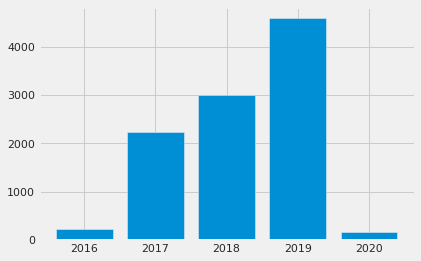

In [41]:
tweets_per_year = {}
for i in tweets['Year']:
  if i not in tweets_per_year:
    tweets_per_year[i] = 1
  else:
    tweets_per_year[i] += 1

keys = tweets_per_year.keys()
values = tweets_per_year.values()

plt.bar(keys,values)

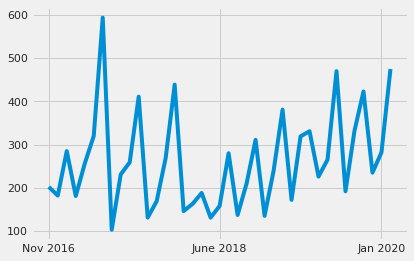

In [42]:
tweets_per_month = {}
for i in tweets['Month_Year']:
  if i not in tweets_per_month:
    tweets_per_month[i] = 1
  else:
    tweets_per_month[i] += 1

lists = sorted(tweets_per_month.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.xticks([0, 19, 37], ['Nov 2016', 'June 2018', 'Jan 2020'])
plt.show()

### Content of Tweets

In [43]:
tweet = tweets['content']
tweet

30889    LIVE on  Periscope Join me for a few minutes i...
30890    Thank you Pennsylvania Going to New Hampshire ...
30891    Today in Florida I pledged to stand with the p...
30892    Big news to share in New Hampshire tonight Pol...
30893    Unbelievable evening in New Hampshire  THANK Y...
                               ...                        
41117    I have never seen the Republican Party as Stro...
41118    Now Mini Mike Bloomberg is critical of Jack Wi...
41119    I was thrilled to be back in the Great State o...
41120    In the House the President got less due proces...
41121    A great show Check it out tonight at 9pm  FoxN...
Name: content, Length: 10233, dtype: object

In [44]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [45]:
most_used_words(tweet.str.cat())[:5]

There is 26381 different words


['the', 'to', 'and', 'of', 'a']

### Plot Market Data 

In [46]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-08,65.44,65.57,64.19,65.38,60.62,666500
1,2016-11-09,65.21,67.14,64.69,66.93,62.06,1034000
2,2016-11-10,67.49,68.29,66.89,67.10,62.22,1211200
3,2016-11-11,66.98,67.32,65.87,66.44,61.60,889400
4,2016-11-14,66.62,66.66,64.57,64.73,60.02,1413300


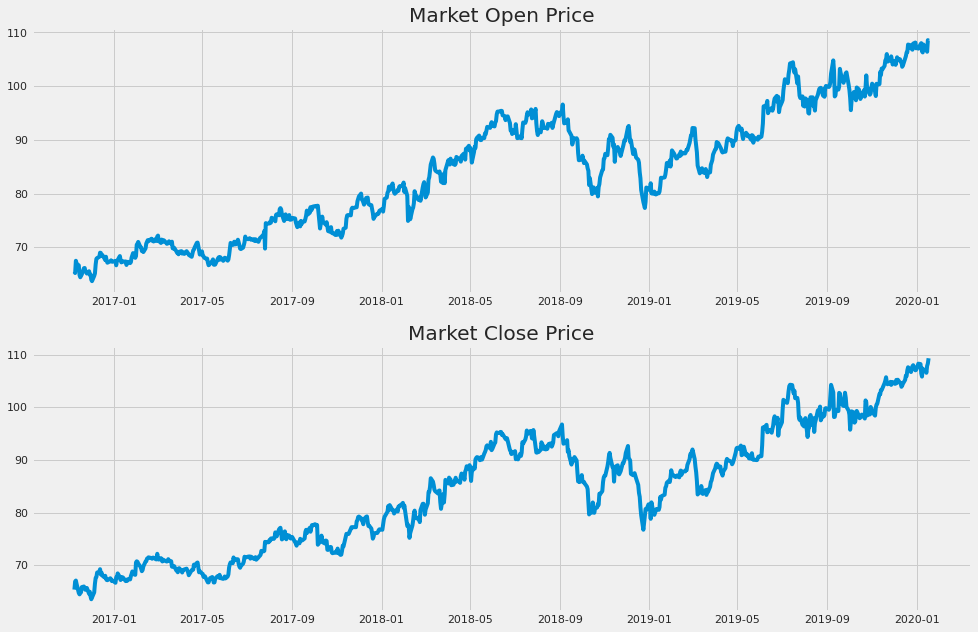

In [47]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(stock_data['Date'], stock_data['Open'])
ax1.set_title('Market Open Price')
ax2.plot(stock_data['Date'], stock_data['Close'])
ax2.set_title('Market Close Price')
plt.show()

Calculate Moving Average

In [48]:
stock_data["SMA1"] = stock_data['Close'].rolling(window=50).mean()
stock_data["SMA2"] = stock_data['Close'].rolling(window=200).mean()

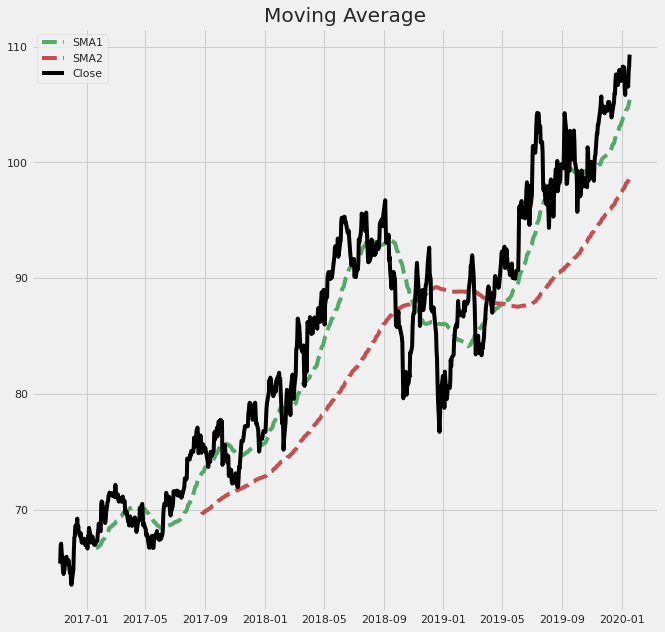

In [49]:
plt.figure(figsize=(10,10))
plt.plot(stock_data['Date'], stock_data['SMA1'], 'g--', label="SMA1")
plt.plot(stock_data['Date'], stock_data['SMA2'], 'r--', label="SMA2")
plt.plot(stock_data['Date'], stock_data['Close'], color='black', label="Close")
plt.title("Moving Average")
plt.plot()
plt.legend()
plt.show()

## Sentiment Analysis

In [50]:
from textblob import TextBlob
from wordcloud import WordCloud

In [51]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
tweets['Subjectivity'] = tweet.apply(getSubjectivity)
tweets['Polarity'] = tweet.apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tweets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,id,content,retweets,favorites,Time,Date,Day,Month,Year,Month_Year,Subjectivity,Polarity
30889,795770006306861057,LIVE on Periscope Join me for a few minutes i...,8765,27429,00:28:48,2016-11-08,8,11,2016,11-2016,0.300000,-0.031818
30890,795779987152523264,Thank you Pennsylvania Going to New Hampshire ...,7743,25771,01:08:28,2016-11-08,8,11,2016,11-2016,0.277273,0.068182
30891,795781945607278592,Today in Florida I pledged to stand with the p...,12110,32433,01:16:15,2016-11-08,8,11,2016,11-2016,0.000000,0.000000
30892,795782371895349250,Big news to share in New Hampshire tonight Pol...,11281,38360,01:17:57,2016-11-08,8,11,2016,11-2016,0.326136,0.234091
30893,795834203430645760,Unbelievable evening in New Hampshire THANK Y...,7796,28222,04:43:54,2016-11-08,8,11,2016,11-2016,0.818182,0.128788
...,...,...,...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,I have never seen the Republican Party as Stro...,32620,213817,19:24:52,2020-01-19,19,1,2020,1-2020,0.634524,0.359524
41118,1219004689716412416,Now Mini Mike Bloomberg is critical of Jack Wi...,36239,149571,22:12:20,2020-01-19,19,1,2020,1-2020,0.450000,-0.175000
41119,1219053709428248576,I was thrilled to be back in the Great State o...,16588,66944,01:27:07,2020-01-20,20,1,2020,1-2020,0.678571,0.382540
41120,1219066007731310593,In the House the President got less due proces...,20599,81921,02:16:00,2020-01-20,20,1,2020,1-2020,0.425417,-0.132917


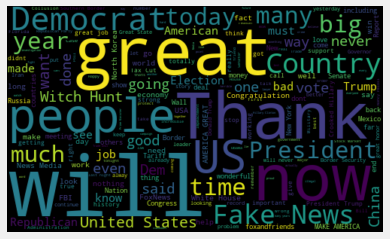

In [52]:
# word cloud visualization
allWords = ' '.join([twts for twts in tweet])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [53]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

tweets['Analysis'] = tweets['Polarity'].apply(getAnalysis)# Show the dataframe
tweets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id,content,retweets,favorites,Time,Date,Day,Month,Year,Month_Year,Subjectivity,Polarity,Analysis
30889,795770006306861057,LIVE on Periscope Join me for a few minutes i...,8765,27429,00:28:48,2016-11-08,8,11,2016,11-2016,0.300000,-0.031818,Negative
30890,795779987152523264,Thank you Pennsylvania Going to New Hampshire ...,7743,25771,01:08:28,2016-11-08,8,11,2016,11-2016,0.277273,0.068182,Positive
30891,795781945607278592,Today in Florida I pledged to stand with the p...,12110,32433,01:16:15,2016-11-08,8,11,2016,11-2016,0.000000,0.000000,Neutral
30892,795782371895349250,Big news to share in New Hampshire tonight Pol...,11281,38360,01:17:57,2016-11-08,8,11,2016,11-2016,0.326136,0.234091,Positive
30893,795834203430645760,Unbelievable evening in New Hampshire THANK Y...,7796,28222,04:43:54,2016-11-08,8,11,2016,11-2016,0.818182,0.128788,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,I have never seen the Republican Party as Stro...,32620,213817,19:24:52,2020-01-19,19,1,2020,1-2020,0.634524,0.359524,Positive
41118,1219004689716412416,Now Mini Mike Bloomberg is critical of Jack Wi...,36239,149571,22:12:20,2020-01-19,19,1,2020,1-2020,0.450000,-0.175000,Negative
41119,1219053709428248576,I was thrilled to be back in the Great State o...,16588,66944,01:27:07,2020-01-20,20,1,2020,1-2020,0.678571,0.382540,Positive
41120,1219066007731310593,In the House the President got less due proces...,20599,81921,02:16:00,2020-01-20,20,1,2020,1-2020,0.425417,-0.132917,Negative


In [84]:
# Print positive tweets
print('Printing positive tweets:\n')
j=1
sortedDF = tweets.sort_values(by=['Polarity'], ascending=False) 
for i in list(sortedDF.index):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['content'][i])
    print()
    j=j+1

Streaming output truncated to the last 5000 lines.

3256) The Dems want to stop tax cuts good healthcare and Border SecurityTheir ObamaCare is dead with 100 increases in Ps Vote now for Karen H

3257) Look forward to being in the Great State of Michigan tonight Major business expansion and jobs pouring into your State Auto companies expanding at record pace Big crowd tonight will be live on TV

3258) Just landed  a long trip but everybody can now feel much safer than the day I took office There is no longer a Nuclear Threat from North Korea Meeting with Kim Jong Un was an interesting and very positive experience North Korea has great potential for the future

3259) In the early days of the hurricane when it was predicted that Dorian would go through Miami or West Palm Beach even before it reached the Bahamas certain models strongly suggested that Alabama  Georgia would be hit as it made its way through Florida  to the Gulf

3260) Our economy is the best in the world by far Lowest unemp